<a href="https://colab.research.google.com/github/akkipant/CS5542-Big-Data-Analytics-and-Applications/blob/master/ICP-5/Source/BDA_ICP_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
 
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import cifar10
from keras.utils import np_utils
from tensorflow.keras.models import Sequential

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
num_classes = 10

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#Original model provided by professor
I removed rescaling layer because I already divided Image Data by 255 after loading.

In [ ]:
num_classes = 10

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(32, 32, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
epochs = 25
optimizer = 'adam'

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [ ]:
epochs = 25
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Epoch 1/25
1563/1563 [==============================] - 6s 4ms/step - loss: 9.5729 - accuracy: 0.1000 - val_loss: 9.7047 - val_accuracy: 0.1000
Epoch 2/25
1563/1563 [==============================] - 6s 4ms/step - loss: 9.4894 - accuracy: 0.1000 - val_loss: 9.3711 - val_accuracy: 0.1000
Epoch 3/25
1563/1563 [==============================] - 6s 4ms/step - loss: 9.2666 - accuracy: 0.1000 - val_loss: 9.3711 - val_accuracy: 0.1000
Epoch 4/25
1563/1563 [==============================] - 6s 4ms/step - loss: 9.2666 - accuracy: 0.1000 - val_loss: 9.3711 - val_accuracy: 0.1000
Epoch 5/25
1563/1563 [==============================] - 6s 4ms/step - loss: 9.2666 - accuracy: 0.1000 - val_loss: 9.3711 - val_accuracy: 0.1000
Epoch 6/25
1563/1563 [==============================] - 6s 4ms/step - loss: 9.2666 - accuracy: 0.1000 - val_loss: 9.3711 - val_accuracy: 0.1000
Epoch 7/25
1563/1563 [==============================] - 6s 4ms/step - loss: 9.2666 - accuracy: 0.1000 - val_loss: 9.3711 - val_accuracy:

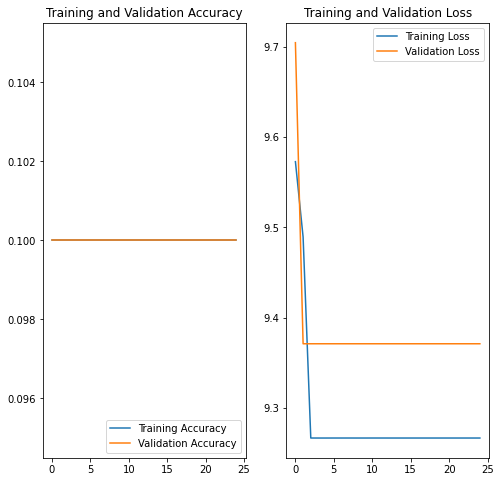

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
 
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs_range = range(epochs)
 
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
 
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#Same model with added SoftMax activation at the end

In [ ]:
num_classes = 10

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(32, 32, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

In [ ]:
epochs = 25
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Epoch 1/25
1563/1563 [==============================] - 6s 4ms/step - loss: 2.0039 - accuracy: 0.2739 - val_loss: 1.8344 - val_accuracy: 0.3567
Epoch 2/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6411 - accuracy: 0.4129 - val_loss: 1.5170 - val_accuracy: 0.4513
Epoch 3/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4423 - accuracy: 0.4820 - val_loss: 1.3764 - val_accuracy: 0.5076
Epoch 4/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3159 - accuracy: 0.5322 - val_loss: 1.2832 - val_accuracy: 0.5453
Epoch 5/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2218 - accuracy: 0.5676 - val_loss: 1.2371 - val_accuracy: 0.5520
Epoch 6/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1475 - accuracy: 0.5960 - val_loss: 1.2096 - val_accuracy: 0.5785
Epoch 7/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0828 - accuracy: 0.6185 - val_loss: 1.1221 - val_accuracy:

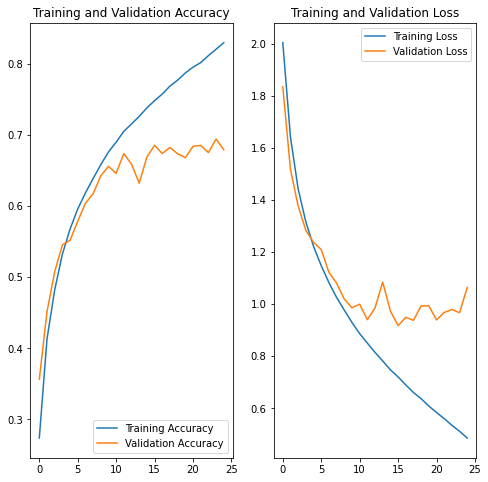

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
 
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs_range = range(epochs)
 
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
 
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

We can see that after a point there is overfitting happening so I am going to add dropouts.

#Model with dropouts and tuned hyperparameters

In [ ]:
#Model with dropouts to save from overfitting
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=X_train.shape[1:]),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(num_classes, activation='softmax')
])

In [ ]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)  #RMSprop for faster training
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0

In [ ]:
epochs = 150
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32, shuffle=False)

Epoch 1/150
1563/1563 [==============================] - 7s 5ms/step - loss: 2.0205 - accuracy: 0.2588 - val_loss: 1.7891 - val_accuracy: 0.3848
Epoch 2/150
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7430 - accuracy: 0.3673 - val_loss: 1.6123 - val_accuracy: 0.4297
Epoch 3/150
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6197 - accuracy: 0.4139 - val_loss: 1.5289 - val_accuracy: 0.4531
Epoch 4/150
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5434 - accuracy: 0.4403 - val_loss: 1.4443 - val_accuracy: 0.4817
Epoch 5/150
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4746 - accuracy: 0.4692 - val_loss: 1.4074 - val_accuracy: 0.4970
Epoch 6/150
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4173 - accuracy: 0.4909 - val_loss: 1.3611 - val_accuracy: 0.5115
Epoch 7/150
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3762 - accuracy: 0.5065 - val_loss: 1.2984 - val_ac

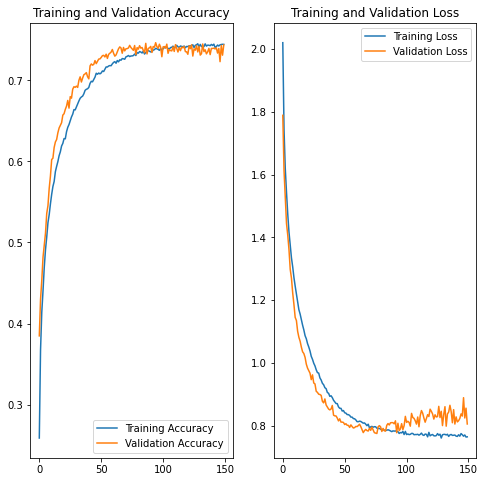

In [ ]:
#Plotting the loss and accuracy curve for Training and Validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
 
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs_range = range(epochs)
 
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
 
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save('cifar10.h5')

### Making predictions used the model.

automobile


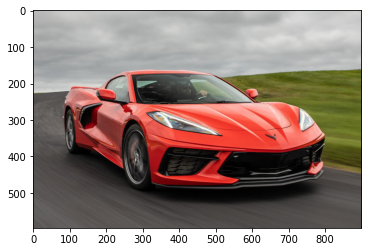

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

img = image.imread('car.jpg')   #loading image into img
img = img / 255.0   #Normalise image
image_resized = resize(img, (32,32,3),)   #resizing the image to the input shape of our model
im = np.expand_dims(image_resized, axis=0)    #Expanding dimension as our model expects a 4D object
plt.imshow(img)
keypoints = model.predict(im)   #Making Prediction
print(labels[np.argmax(keypoints)])   #Printing the predicted class label

deer


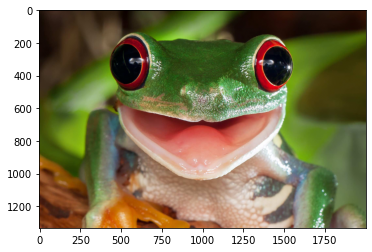

In [ ]:
img = image.imread('frog.jpg')
img = img/255.0
image_resized = resize(img, (32,32,3),)
im = np.expand_dims(image_resized, axis=0)
plt.imshow(img)
keypoints = model.predict(im)
print(labels[np.argmax(keypoints)])

bird


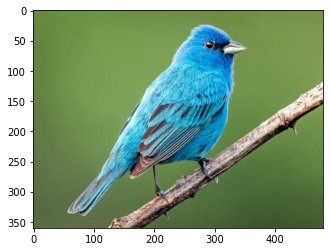

In [ ]:
img = image.imread('bird.jpg')
img = img/255.0
image_resized = resize(img, (32,32,3),)
im = np.expand_dims(image_resized, axis=0)
plt.imshow(img)
keypoints = model.predict(im)
print(labels[np.argmax(keypoints)])

dog


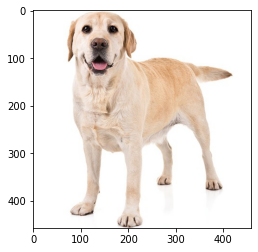

In [ ]:
img = image.imread('dog.jpg')
img = img/255.0
image_resized = resize(img, (32,32,3),)
im = np.expand_dims(image_resized, axis=0)
plt.imshow(img)
keypoints = model.predict(im)
print(labels[np.argmax(keypoints)])

horse


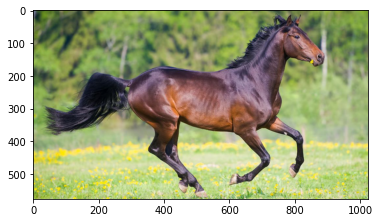

In [ ]:
import imageio

img = imageio.imread('horse.png')
img = img/255.0
image_resized = resize(img, (32,32,3),)
im = np.expand_dims(image_resized, axis=0)
plt.imshow(img)
keypoints = model.predict(im)
print(labels[np.argmax(keypoints)])

truck


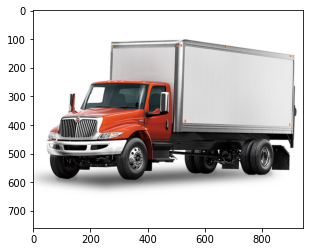

In [ ]:
img = image.imread('truck.jpg')
img = img/255.0
image_resized = resize(img, (32,32,3),)
im = np.expand_dims(image_resized, axis=0)
plt.imshow(img)
keypoints = model.predict(im)
print(labels[np.argmax(keypoints)])

airplane


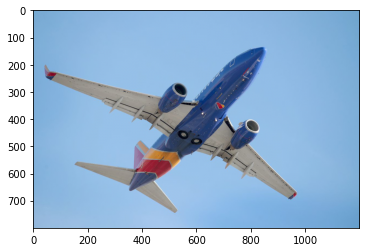

In [ ]:
img = image.imread('airplane.jpg')
img = img/255.0
image_resized = resize(img, (32,32,3),)
im = np.expand_dims(image_resized, axis=0)
plt.imshow(img)
keypoints = model.predict(im)
print(labels[np.argmax(keypoints)])